# U.S. Medical Insurance Costs - Trends in costs

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Inspecting the dataset using the csv library:

In [3]:
with open('insurance.csv', newline='') as insurance_csv:
    insurance_reader = csv.reader(insurance_csv, delimiter=' ')
    for row in insurance_reader:
        print(', '.join(row))

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107
60,female,25.84,0,no,northwest,28923.13692
25,male,26.22,0,no,northeast,2721.3208
62,female,26.29,0,yes,southeast,27808.7251
23,male,34.4,0,no,southwest,1826.843
56,female,39.82,0,no,southeast,11090.7178
27,male,42.13,0,yes,southeast,39611.7577
19,male,24.6,1,no,southwest,1837.237
52,female,30.78,1,no,northeast,10797.3362
23,male,23.845,0,no,northeast,2395.17155
56,male,40.3,0,no,southwest,10602.385
30,male,35.3,0,yes,southwest,36837.467
60,female,36.005,0,no,northeast,13228.84695
30,female,32.4,1,no,southwest,4149.736
18,male,34.1,0,no,southeast,1137.011
34,female,31.92,1,yes,northeast,37701

Inspecting the dataset using the pandas library:

In [4]:
insurance_csv = pd.read_csv('insurance.csv')
result = insurance_csv.head(10)
print("First 10 rows of the DataFrame:")
print(result)

First 10 rows of the DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


Turning the dataset into a list of dictionaries for each subject:

In [5]:
insurance_dict={}
with open('insurance.csv', newline='') as insurance_csv:
    insurance_reader = csv.DictReader(insurance_csv)
    insurance_list=[row for row in insurance_reader]

Transforming numbers into float or int:

In [6]:
for i in insurance_list:
    i['age']=float(i['age'])
    i['bmi']=float(i['bmi'])
    i['children']=int(i['children'])
    i['charges']=float(i['charges'])
print(insurance_list)

[{'age': 19.0, 'sex': 'female', 'bmi': 27.9, 'children': 0, 'smoker': 'yes', 'region': 'southwest', 'charges': 16884.924}, {'age': 18.0, 'sex': 'male', 'bmi': 33.77, 'children': 1, 'smoker': 'no', 'region': 'southeast', 'charges': 1725.5523}, {'age': 28.0, 'sex': 'male', 'bmi': 33.0, 'children': 3, 'smoker': 'no', 'region': 'southeast', 'charges': 4449.462}, {'age': 33.0, 'sex': 'male', 'bmi': 22.705, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 21984.47061}, {'age': 32.0, 'sex': 'male', 'bmi': 28.88, 'children': 0, 'smoker': 'no', 'region': 'northwest', 'charges': 3866.8552}, {'age': 31.0, 'sex': 'female', 'bmi': 25.74, 'children': 0, 'smoker': 'no', 'region': 'southeast', 'charges': 3756.6216}, {'age': 46.0, 'sex': 'female', 'bmi': 33.44, 'children': 1, 'smoker': 'no', 'region': 'southeast', 'charges': 8240.5896}, {'age': 37.0, 'sex': 'female', 'bmi': 27.74, 'children': 3, 'smoker': 'no', 'region': 'northwest', 'charges': 7281.5056}, {'age': 37.0, 'sex': 'male', '

Plotting and calculating the correlation between age and insurance cost:

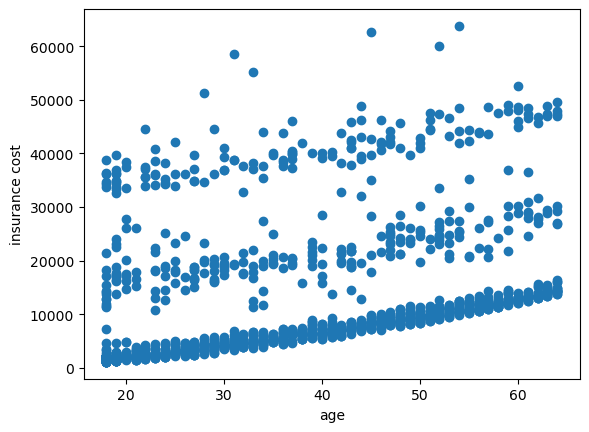

In [7]:
ages=[]
insuranceCosts=[]
for patient in insurance_list:
    ages.append(patient['age'])
    insuranceCosts.append(patient['charges'])
xpoints = ages
ypoints = insuranceCosts

plt.xlabel('age')
plt.ylabel('insurance cost')

plt.plot(xpoints, ypoints, 'o')
plt.show()

There seems to be a correlation between age and insurance cost, stratified on some other variable. (maybe number of children)
Let's see if the number of children influences the insurance cost:

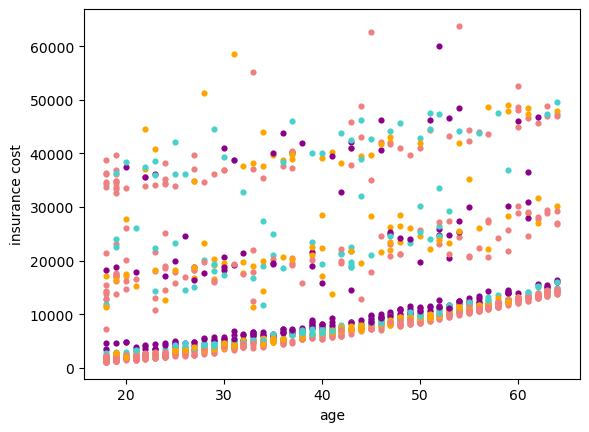

In [18]:
col_children=[]



for i in range(len(insurance_list)):
    if insurance_list[i]['children']==0:
        col_children.append('lightcoral')
    elif insurance_list[i]['children']==1:
        col_children.append('orange')
    elif insurance_list[i]['children']==2:
        col_children.append('mediumturquoise')
    else:
        col_children.append('darkmagenta')
    plt.scatter(insurance_list[i]['age'],insurance_list[i]['charges'], c=col_children[i],s=20, linewidth=0)
    plt.xlabel('age')
    plt.ylabel('insurance cost')

Children do not seem to be the cause for this categorization.
Let's see if there is actually any difference between the costs in terms of number of children:

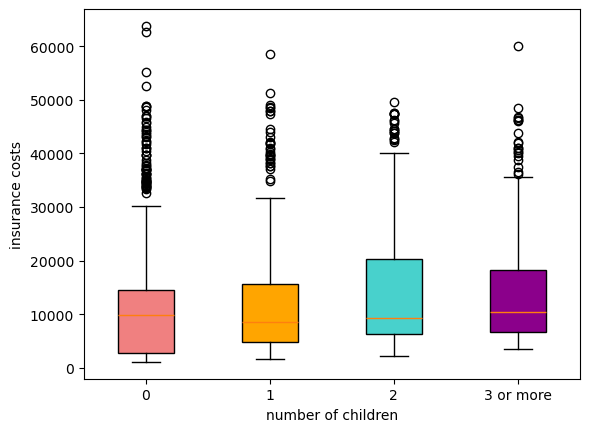

In [9]:
costs_per_child=[[],[],[],[]]
for patient in insurance_list:
    if patient['children']==0:
        costs_per_child[0].append(patient['charges'])
    elif patient['children']==1:
        costs_per_child[1].append(patient['charges'])
    elif patient['children']==2:
        costs_per_child[2].append(patient['charges'])
    else:
        costs_per_child[3].append(patient['charges'])


labels=['0', '1', '2', '3 or more']
colors = ['lightcoral', 'orange', 'mediumturquoise', 'darkmagenta']
fig, ax = plt.subplots()
ax.set_ylabel('insurance costs')
ax.set_xlabel('number of children')

bplot = ax.boxplot(costs_per_child,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

Maybe the region?

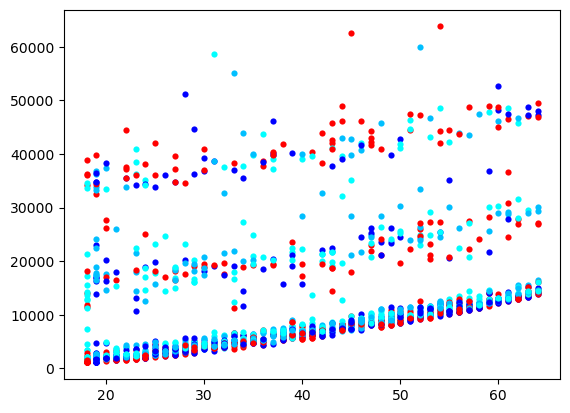

In [10]:
col_region=[]
for i in range(len(insurance_list)):
    if insurance_list[i]['region']=='southwest':
        col_region.append('blue')
    elif insurance_list[i]['region']=='northwest':
        col_region.append('deepskyblue')
    elif insurance_list[i]['region']=='northeast':
        col_region.append('aqua')
    else:
        col_region.append('red')
    plt.scatter(insurance_list[i]['age'],insurance_list[i]['charges'], c=col_region[i],s=20, linewidth=0)

Not very convincing...

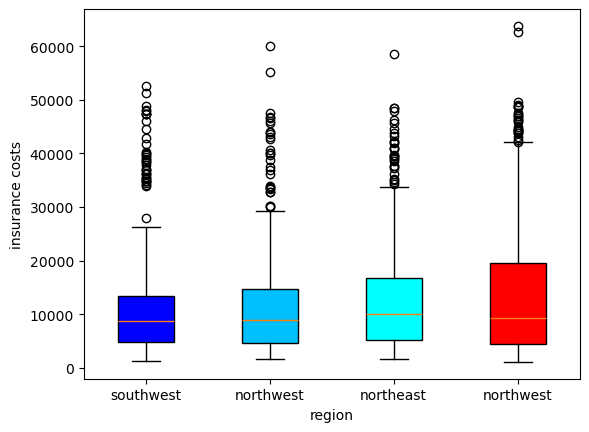

In [12]:
costs_per_region=[[],[],[],[]]
for patient in insurance_list:
    if patient['region']=='southwest':
        costs_per_region[0].append(patient['charges'])
    elif patient['region']=='northwest':
        costs_per_region[1].append(patient['charges'])
    elif patient['region']=='northeast':
        costs_per_region[2].append(patient['charges'])
    else:
        costs_per_region[3].append(patient['charges'])
        


labels=['southwest', 'northwest', 'northeast', 'northwest']
colors = ['blue', 'deepskyblue', 'aqua', 'red']
fig, ax = plt.subplots()
ax.set_ylabel('insurance costs')
ax.set_xlabel('region')

bplot = ax.boxplot(costs_per_region,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

Visualising difference in insurance costs between male and female:

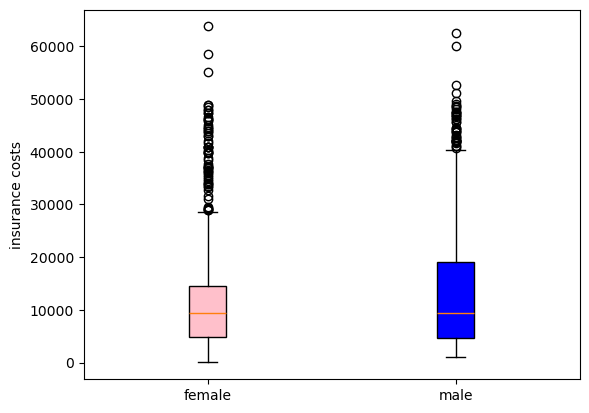

In [71]:
costs_per_gender=[[],[]]
for patient in insurance_list:
    if patient['sex']=='female':
        costs_per_gender[0].append(patient['charges'])
    elif patient['sex']=='male':
        costs_per_gender[1].append(patient['charges'])
    else:
        continue

labels=['female', 'male']
colors = ['pink', 'blue']
fig, ax = plt.subplots()
ax.set_ylabel('insurance costs')

bplot = ax.boxplot(costs_per_gender,
                   patch_artist=True,  # fill with color
                   tick_labels=labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

The data does not seem to indicate a different insurance cost per gender.

Let's see if BMI influences this stratification.

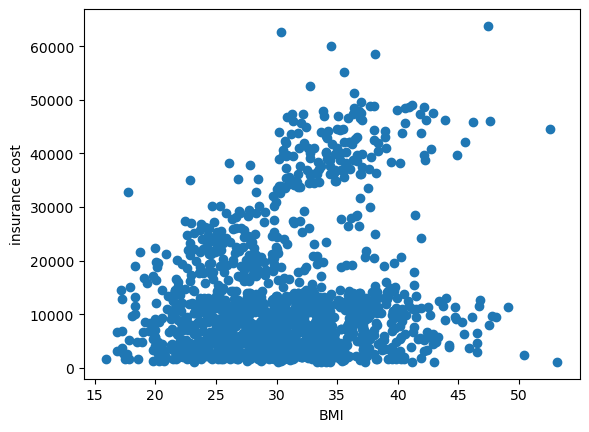

In [17]:
BMIs=[]
insuranceCosts=[]
for patient in insurance_list:
    BMIs.append(patient['bmi'])
    insuranceCosts.append(patient['charges'])
xpoints = BMIs
ypoints = insuranceCosts

plt.xlabel('BMI')
plt.ylabel('insurance cost')

plt.plot(xpoints, ypoints, 'o')
plt.show()

Honestly I can't figure out what is with those strata, might be a combination of multiple variables...